<a href="https://colab.research.google.com/github/saugatrai33/ML-Projects/blob/main/Nepal_Municipality_Finder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dependency Installation

In [1]:
%%time 

!pip install geopandas

     |████████████████████████████████| 1.0 MB 5.4 MB/s 
     |████████████████████████████████| 16.7 MB 31.0 MB/s 
     |████████████████████████████████| 6.3 MB 22.7 MB/s 
CPU times: user 99.1 ms, sys: 26.8 ms, total: 126 ms
Wall time: 7.4 s


## Import dependencies

In [2]:
import geopandas as gpd
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon

## Read geojson data from github raw

In [3]:
munis = gpd.read_file('https://raw.githubusercontent.com/mesaugat/geoJSON-Nepal/master/nepal-municipalities.geojson')
munis.head()

,id,F_ID,N_ID,NAME,LEVEL,DISTRICT,geometry
0,None,104,bhaktapur-bhaktapur,Bhaktapur,Nagarpalika,Bhaktapur,"POLYGON ((85.44459 27.66441, 85.44378 27.66359..."
1,None,105,madhyapur -thimi-bhaktap,Madhyapur Thimi,Nagarpalika,Bhaktapur,"POLYGON ((85.36314 27.66892, 85.35419 27.66769..."
2,None,343,kathmandu-kathmandu,Kathmandu,Mahanagarpalika,Kathmandu,"POLYGON ((85.28577 27.68983, 85.28414 27.69270..."
3,None,344,kirtipur-kathmandu,Kirtipur,Nagarpalika,Kathmandu,"POLYGON ((85.25319 27.64555, 85.25238 27.65416..."
4,None,396,chitwan -national -park-,Chitwan National Park,national-park,Makwanpur,"POLYGON ((84.71727 27.56355, 84.71727 27.55945..."


In [4]:
munis.shape

(766, 7)

In [5]:
munis.describe()

,F_ID
count,766.000000
mean,381.873368
std,219.031358
min,1.000000
25%,192.250000
50%,383.500000
75%,572.750000
max,756.000000


## Nepal Municipality plotting

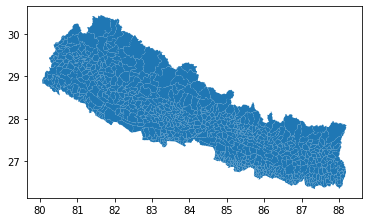

In [6]:
munis.plot()

## Selecting required columns

In [7]:
municipalities = munis[["NAME", "LEVEL", "DISTRICT", "geometry"]].set_index("DISTRICT")

In [8]:
municipalities.head()

,NAME,LEVEL,geometry
DISTRICT,,,
Bhaktapur,Bhaktapur,Nagarpalika,"POLYGON ((85.44459 27.66441, 85.44378 27.66359..."
Bhaktapur,Madhyapur Thimi,Nagarpalika,"POLYGON ((85.36314 27.66892, 85.35419 27.66769..."
Kathmandu,Kathmandu,Mahanagarpalika,"POLYGON ((85.28577 27.68983, 85.28414 27.69270..."
Kathmandu,Kirtipur,Nagarpalika,"POLYGON ((85.25319 27.64555, 85.25238 27.65416..."
Makwanpur,Chitwan National Park,national-park,"POLYGON ((84.71727 27.56355, 84.71727 27.55945..."


## Finding municipality of Nepal from given latitude and longitude

In [9]:
poly = municipalities.geometry[:]
chandragiri = Point(85.44459, 27.66441)
municipality = municipalities.loc[poly.contains(chandragiri)]
municipality

,NAME,LEVEL,geometry
DISTRICT,,,
Bhaktapur,Bhaktapur,Nagarpalika,"POLYGON ((85.44459 27.66441, 85.44378 27.66359..."
